In [182]:
import numpy as np
import matplotlib.pyplot as plt

In [183]:
def scatter_plot(data, col=None):
    from mpl_toolkits.mplot3d import Axes3D
    %matplotlib inline
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2], s = 0.5, color=col)
    plt.show()

In [184]:
N = 1000
K = 3
d = 3
L = 10

In [185]:
# Generate some data
np.random.seed(42)
mu_true = np.random.uniform(-L, L, size = (K, d))
data = np.random.normal(mu_true, size = (N, K, d))
data = np.vstack(data)
np.random.shuffle(data)

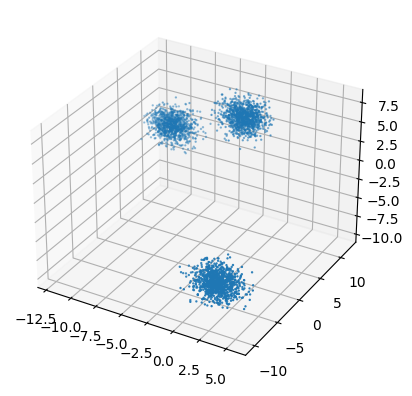

In [186]:
if d == 3:
    scatter_plot(data, None)

In [187]:
mu = data[np.random.choice(range(data.shape[0]), K, replace=False)]

## **Slow implementation**

In [188]:
def dist_i(x, mu):
    # x: N datapoints, mu: N cluster centers
    # returns: D_{i}, squared distances from x[i] to mu[i]
    dist = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        dist[i] = np.sum((x[i] - mu[i])**2)
    return dist
def dist_ij(x, mu):
    # x: N datapoints, mu: K cluster centers
    # returns: D_{ij}, squared distances from x[i] to mu[j]
    dist = np.zeros((x.shape[0], mu.shape[0]))
    for i in range(x.shape[0]):
        for j in range(mu.shape[0]):
            dist[i, j] += np.sum((x[i] - mu[j])**2)
    return dist

In [189]:
def kmeans(data, mu):
    ss_list = []
    for n in range(10):
        c =  np.argmin(dist_ij(data, mu), axis = 1)
        ss = np.mean(dist_i(data, mu[c]))
        ss_list.append(ss)
        for i in range(K):
            cluster_members = data[c == i]
            cluster_members = cluster_members.mean(axis = 0)
            mu[i] = cluster_members
    return ss_list, c

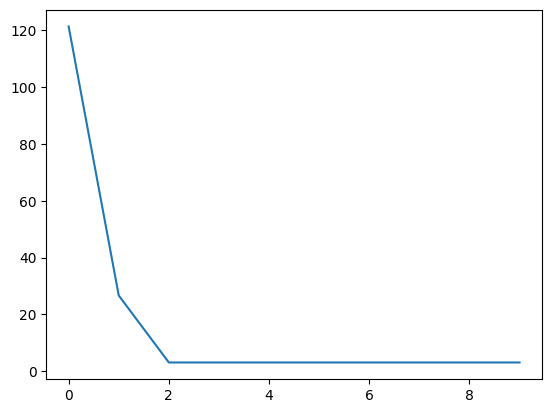

In [190]:
res, c = kmeans(data, mu)
plt.plot(res);

In [191]:
%time kmeans(data, mu)
%time kmeans(data, mu)
%time kmeans(data, mu)
""

CPU times: user 1.41 s, sys: 963 µs, total: 1.41 s
Wall time: 1.46 s
CPU times: user 908 ms, sys: 223 µs, total: 908 ms
Wall time: 917 ms
CPU times: user 760 ms, sys: 2.65 ms, total: 763 ms
Wall time: 765 ms


''

In [192]:
colors = np.array([plt.cm.cool(i/(K-1)) for i in range(K)])

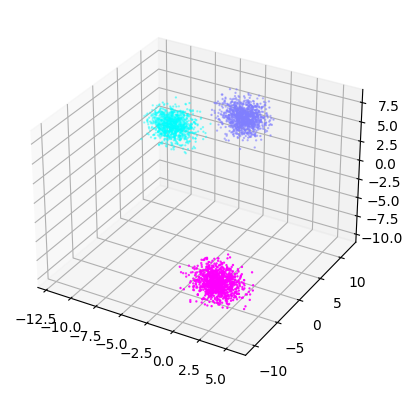

In [193]:
if d == 3:
    scatter_plot(data, colors[c])

## **Fast implementation**  
To speed up `dist_i` we will simply use `numpy` vectorization.  
For `dist_iо` we will note that the $ij$-element of the output matrix $C$ has the form:  

$c_{ij} = \sum_{k=1}^{n}(x_{ik} + mu_{jk})^2 = \sum_{k=1}^{n}x_{ik}^2 - 2\sum_{k=1}^{n}x_{ik}mu_{jk} + \sum_{k=1}^{n}mu_{jk}^2$.  

Using vectorization of `numpy`, you can represent the terms as:  


---


$(\sum_{k=1}^{n}x_{1k}^2 \sum_{k=1}^{n}x_{2k}^2 ... \sum_{k=1}^{n}x_{mk}^2)^T =$ `np.sum(x**2, axis=1).reshape((x.shape[0], 1))`  


---


$\underset{1 ≤ i ≤ m\\1 ≤ j ≤ n}{(-2\sum_{k=1}^{n}x_{ik}mu_{jk})} = $ `-2*(x @ mu.T)`  


---


$(\sum_{k=1}^{n}mu_{1k}^2 \sum_{k=1}^{n}mu_{2k}^2 ... \sum_{k=1}^{n}mu_{nk}^2)^T = $ `np.sum(mu**2, axis = 1).reshape((1, mu.shape[0]))`


---

Using `numpy` broadcasting we can add these terms and get the desired matrix.

In [194]:
# Generate some data
np.random.seed(42)
mu_true = np.random.uniform(-L, L, size = (K, d))
data = np.random.normal(mu_true, size = (N, K, d))
data = np.vstack(data)
np.random.shuffle(data)

In [195]:
mu = data[np.random.choice(range(data.shape[0]), K, replace=False)]

In [196]:
def dist_i(x, mu):
    # x: N datapoints, mu: N cluster centers
    # returns: D_{i}, squared distances from x[i] to mu[i]
    dist = np.sum((x - mu)**2, axis=1)
    return dist
def dist_ij(x, mu):
    # x: N datapoints, mu: K cluster centers
    # returns: D_{ij}, squared distances from x[i] to mu[j]
    sum_xij = np.sum(x**2, axis = 1).reshape((x.shape[0], 1))
    sum_muij = np.sum(mu**2, axis = 1).reshape((1, mu.shape[0]))
    sum_xij_muij = -2 * (x @ mu.T)
    dist = sum_xij + sum_xij_muij + sum_muij
    return dist

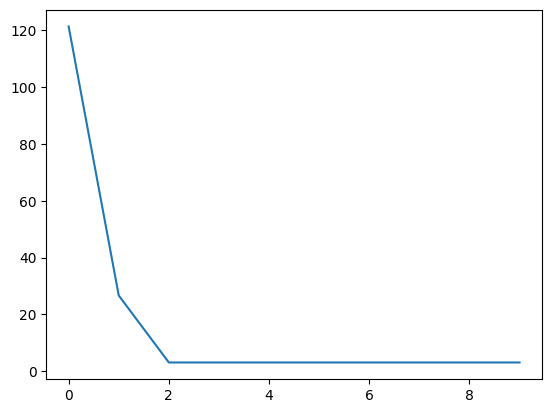

In [197]:
res, c = kmeans(data, mu)
plt.plot(res);

In [198]:
%time kmeans(data, mu)
%time kmeans(data, mu)
%time kmeans(data, mu)
""

CPU times: user 11.5 ms, sys: 0 ns, total: 11.5 ms
Wall time: 12.5 ms
CPU times: user 7.45 ms, sys: 0 ns, total: 7.45 ms
Wall time: 7.46 ms
CPU times: user 7.05 ms, sys: 0 ns, total: 7.05 ms
Wall time: 7.06 ms


''

In [199]:
colors = np.array([plt.cm.cool(i/(K-1)) for i in range(K)])

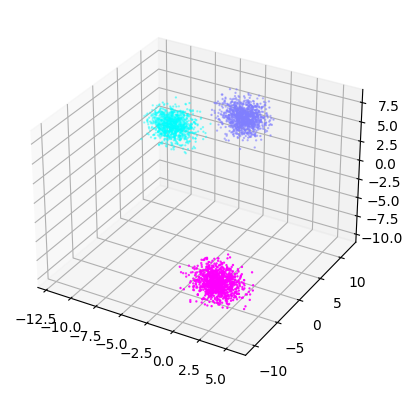

In [200]:
if d == 3:
    scatter_plot(data, colors[c])

## Now let's run a faster algorithm for $H = 10000$

In [201]:
N = 10000
K = 3
d = 3
L = 10

In [202]:
# Generate some data
np.random.seed(42)
mu_true = np.random.uniform(-L, L, size = (K, d))
data = np.random.normal(mu_true, size = (N, K, d))
data = np.vstack(data)
np.random.shuffle(data)

In [203]:
mu = data[np.random.choice(range(data.shape[0]), K, replace=False)]

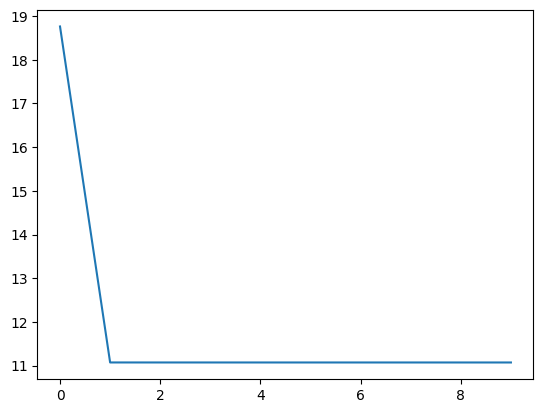

In [204]:
res, c = kmeans(data, mu)
plt.plot(res);

In [205]:
%time kmeans(data, mu)
%time kmeans(data, mu)
%time kmeans(data, mu)
""

CPU times: user 88.5 ms, sys: 69.7 ms, total: 158 ms
Wall time: 83.9 ms
CPU times: user 95.6 ms, sys: 68.2 ms, total: 164 ms
Wall time: 85.1 ms
CPU times: user 87.7 ms, sys: 62 ms, total: 150 ms
Wall time: 84.5 ms


''

In [206]:
colors = np.array([plt.cm.cool(i/(K-1)) for i in range(K)])

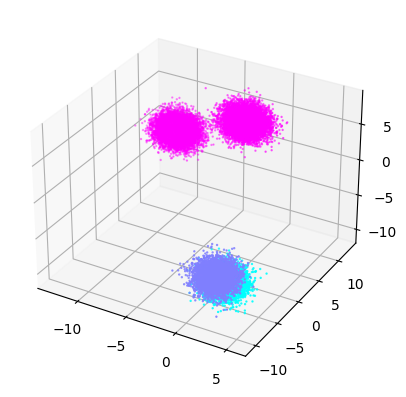

In [207]:
if d == 3:
    scatter_plot(data, colors[c])